# Polynomial regression

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(font_scale=.75)

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [9]:
m = 100

rng = np.random.default_rng(seed=42)

X = (5 * rng.random(m,) - 3).reshape(-1, 1)
y = 3 * X[:, 0]**2 + X[:, 0] + 2 + rng.random(m) * 8  # Nonlinear relationship + noise

<Axes: >

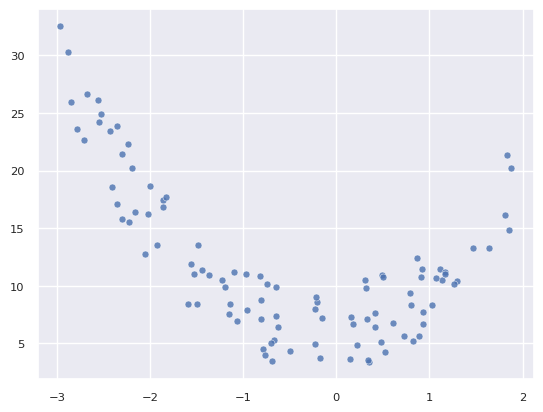

In [10]:
sns.scatterplot(x=X[:, 0], y=y, alpha=.8, s=25)

### Träna modeller

#### Utan `PolynomialFeatures`

In [11]:
m1 = LinearRegression()
m1.fit(X, y)

LinearRegression()

<Axes: >

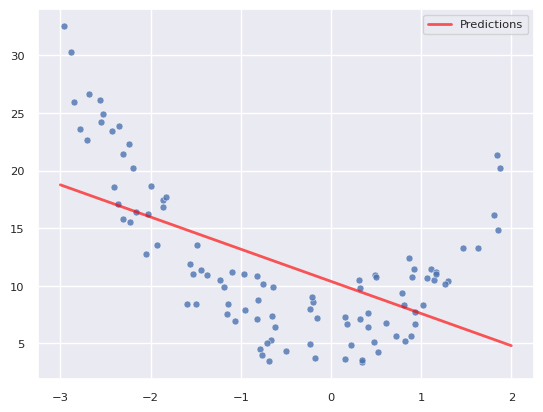

In [12]:
x = np.linspace(-3, 2, m) # Linjär data för att plotta en linje

sns.scatterplot(x=X[:, 0], y=y, alpha=.8, s=25)
sns.lineplot(x=x, y=m1.predict(x.reshape(-1, 1)), c="red", alpha=.65, lw=2, label="Predictions")

In [13]:
m1.coef_

array([-2.79273984])

#### Med `PolynomialFeatures`

In [14]:
m2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
m2.fit(X, y)
cross_val_score(m2, X, y).mean()

np.float64(0.8590385957661397)

<Axes: >

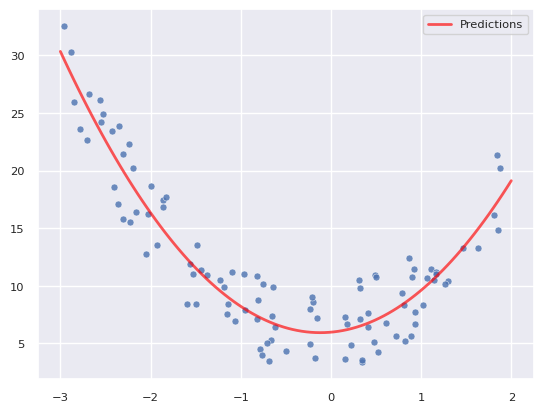

In [15]:
sns.scatterplot(x=X[:, 0], y=y, alpha=.8, s=25)
sns.lineplot(x=x, y=m2.predict(x.reshape(-1, 1)), c="red", alpha=.65, lw=2, label="Predictions") # type: ignore

`m2` är en pipeline. För att komma åt *estimatorn* använder vi `named_steps`.

In [16]:
m2.named_steps["linearregression"].coef_

array([0.        , 0.69570284, 2.9402351 ])

### Sidospår

När vi plottar våra prediktioner här ovan använder vi `.reshape(-1, 1)` på `x`. Hur kan det komma sig?

Jo, `predict()` vill ha datan som en (m, n)-matris, men `x` är en (m, )-vektor eftersom vi använde `linspace()`.

In [17]:
x.shape

(100,)

In [18]:
x.reshape(-1, 1).shape

(100, 1)

Vi skulle kunna ange en av `start` eller `stop`-parametrarna som enda elementet i en lista och därmed få rätt shaåe från början, men då leker den inte lika bra i visualiseringen...

In [27]:
try:
    sns.lineplot(x=np.linspace([-1], 1, 100), y=rng.normal(size=100))
except Exception as e:
    print(e)

Per-column arrays must each be 1-dimensional


<Axes: >

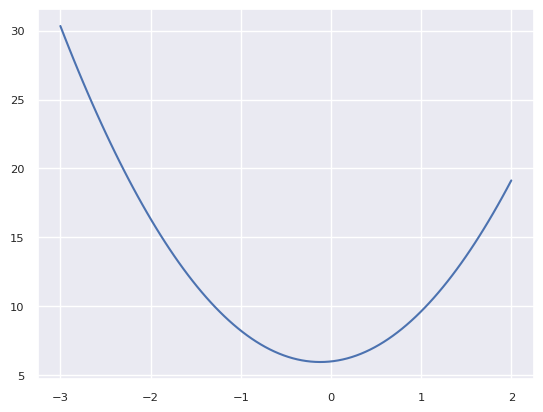

In [29]:
sns.lineplot(x=np.linspace(-3, 2, 100), y=m2.predict(np.linspace([-3], 2, 100))) # type:ignore